In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns

In [ ]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2017-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})
df["y"].plot(figsize=(10,6));
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range("2017-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})
df["y"].plot(figsize=(10,6));

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range("2017-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})
df["y"].plot(figsize=(10,6));

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
pinkwink_web = pd.read_excel("../data/pinkwink_web.xlsx", names=["ds", "hit"])
df = pd.DataFrame({"ds":pd.to_datetime(pinkwink_web["ds"], format="%y. %m. %d."),
          "y":pinkwink_web["hit"]})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,6))
for each in ["trend", "yhat", "yhat_lower", "yhat_upper"]:
    plt.plot(forecast["ds"], forecast[each], label=each)

plt.legend(loc="best")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
for each in ["trend", "yhat", "yearly"]:
    plt.plot(forecast["ds"], forecast[each], label=each)

plt.legend(loc="best")
plt.show()

/home/han/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/han/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/han/venv/eda_venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

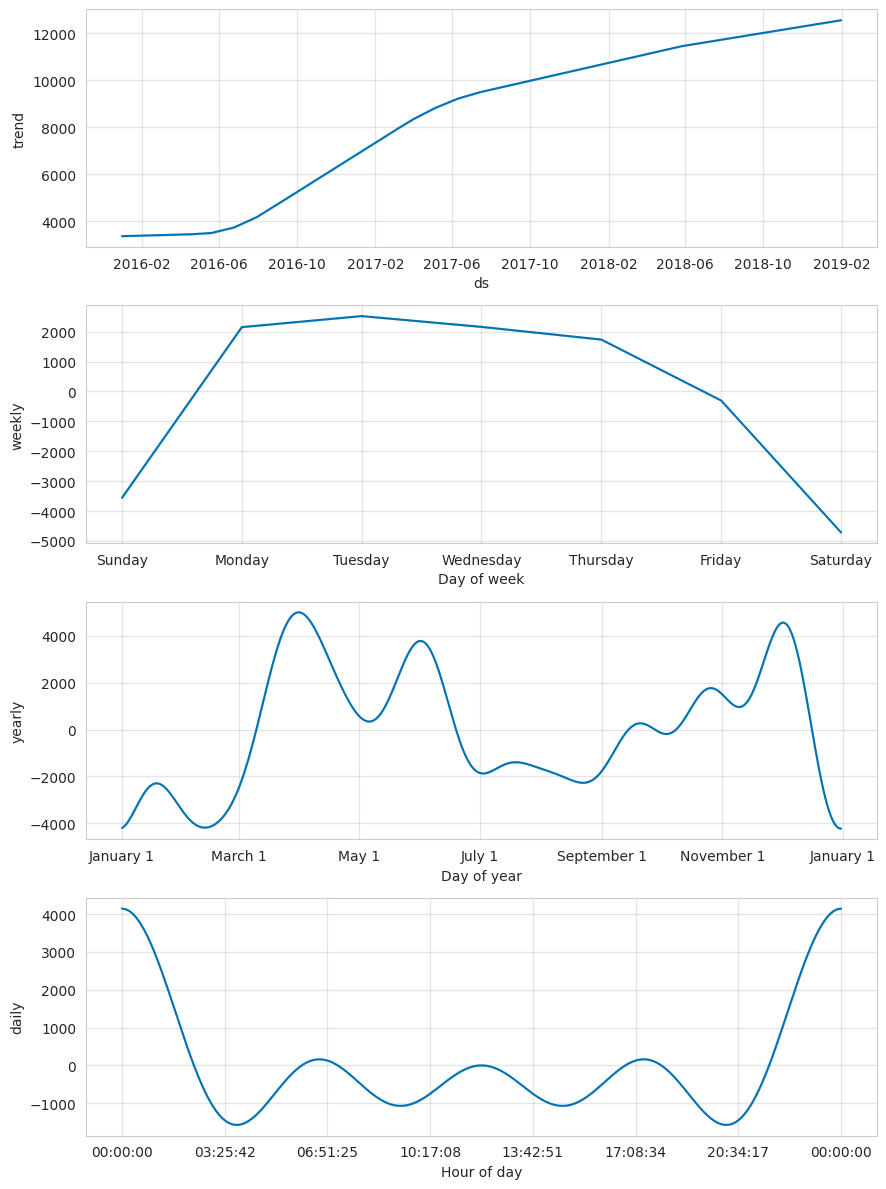

In [24]:
m.plot_components(forecast);

In [25]:
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
KIA = yf.download("005930.KS",
                  start="2000-01-01",
                  end="2024-03-04")
KIA = KIA[["Close"]]
KIA = KIA.reset_index()
KIA.columns = ["ds", "y"]

In [ ]:
m = Prophet()
m.fit(KIA)
future = m.make_future_dataframe(periods=300)
future.tail()

In [ ]:
forecast = m.predict(future)
plt.figure(figsize=(12,6))
plt.plot(KIA["ds"], KIA["y"])
plt.show()